In [17]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
df=pd.read_csv("HumanResources.csv")
df.head(10)

,employee_id,first_name,last_name,gender,state,city,hire_date,department,job_title,education_level,performance_rating,overtime,base_salary,salary,birth_date,termination_date
0,00-73695798,Olimpiada,Fedotova,Female,Moscow,Moscow,2017-08-28,Sales,Sales Specialist,Bachelor,Good,No,79104,84511,1994-07-25,NaN
1,00-81018730,Ljubov',Baranova,Female,Moscow,Moscow,2022-05-19,Customer Service,Support Specialist,Bachelor,Satisfactory,Yes,54030,58165,1983-12-04,NaN
2,00-29139495,Mstislav,Trofimov,Male,Moscow,Moscow,2018-04-10,Operations,Operations Analyst,Master,Good,No,55805,60266,1974-05-17,NaN
3,00-60298696,Rodion,Pahomov,Male,Moscow,Moscow,2019-11-11,Sales,Sales Representative,Bachelor,Needs Improvement,No,53844,64566,1995-05-02,NaN
4,00-96356860,Zosima,Naumov,Male,Kazan,Kazan,2023-01-01,Operations,Inventory Specialist,High School,Needs Improvement,No,58672,61998,2004-07-13,NaN
5,00-90726197,Julija,Kulikova,Female,Kazan,Kazan,2017-12-23,Marketing,Content Creator,Bachelor,Satisfactory,No,54587,57909,1998-05-07,NaN
6,00-10223590,Margarita,Sorokina,Female,Moscow,Moscow,2022-05-04,Operations,Operations Manager,Bachelor,Satisfactory,No,89060,94566,1964-08-12,NaN
7,00-29502210,Evfrosinija,Semenova,Female,Moscow,Moscow,2024-07-29,Sales,Sales Representative,Bachelor,Satisfactory,No,62227,66814,1983-08-11,NaN
8,00-59345867,Evstignej,Vorob'ev,Male,Kazan,Kazan,2017-07-06,Operations,Logistics Coordinator,Bachelor,Satisfactory,No,55641,65235,2003-03-18,NaN
9,00-38219499,Martyn,Fedoseev,Male,Moscow,Moscow,2016-05-27,Operations,Operations Analyst,Master,Satisfactory,No,55540,59369,1993-06-19,NaN


In [19]:
df['Attrition']=df['termination_date'].notna().astype(int)


In [20]:
df.drop(columns=['employee_id','first_name','last_name','termination_date'], inplace =True)

In [21]:
from pandas._libs.tslibs.timestamps import Timestamp

df['birth_date'] = pd.to_datetime(df['birth_date'])
df['hire_date'] = pd.to_datetime(df['hire_date'])

df['age'] = (pd.Timestamp.today() - df['birth_date']).dt.days // 365
df['experience_years'] = (pd.Timestamp.today() - df['hire_date']).dt.days // 365



In [22]:
df['birth_date'] = df['birth_date'].astype('int64')
df['hire_date'] = df['hire_date'].astype('int64')


In [23]:
df['gender']=df['gender'].map({'Male':1,'Female':0})
df['overtime']=df['overtime'].map({'Yes':1,'No':0})

education_map={'High School':1,'Bachelor':2,'Master':3,'Phd':4}
df['education_level']=df['education_level'].map(education_map)

performance_map={
    "Needs Improvment":1,
    "Satisfactory":2,
    'Good':3,
    'Excellent':4
}
df['performance_rating']=df['performance_rating'].map(performance_map)

In [24]:
df=pd.get_dummies(df,columns=['state','city','department','job_title'],drop_first=True)

In [25]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
## Train model
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8896551724137931
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       129
           1       0.00      0.00      0.00        16

    accuracy                           0.89       145
   macro avg       0.44      0.50      0.47       145
weighted avg       0.79      0.89      0.84       145



C:\Users\91899\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91899\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91899\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

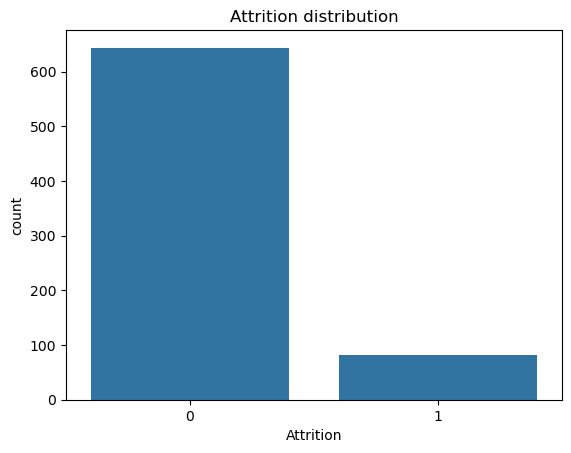

In [31]:
sns.countplot(x='Attrition',data=df)
plt.title("Attrition distribution")
plt.show()

Accuracy: 0.8896551724137931
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       129
           1       0.00      0.00      0.00        16

    accuracy                           0.89       145
   macro avg       0.44      0.50      0.47       145
weighted avg       0.79      0.89      0.84       145



C:\Users\91899\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91899\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91899\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


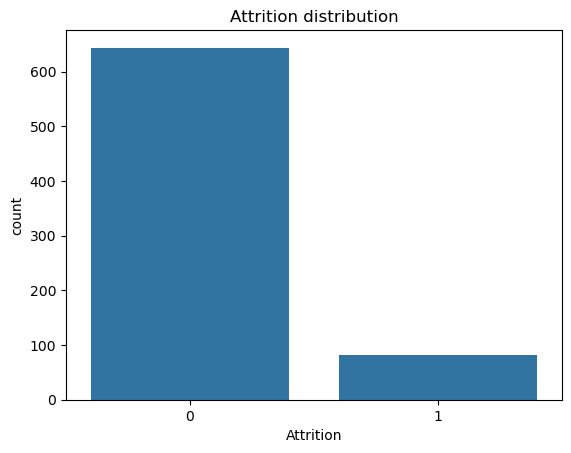

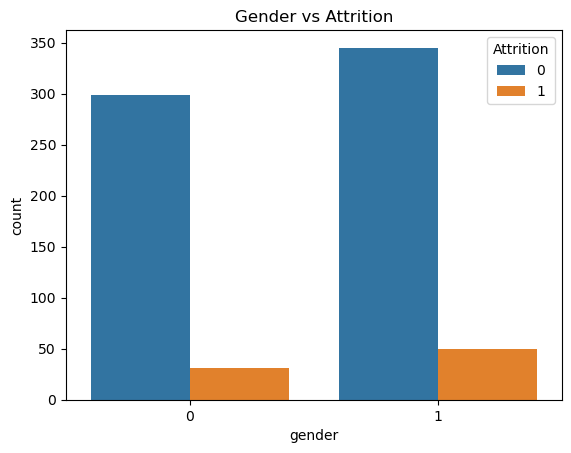

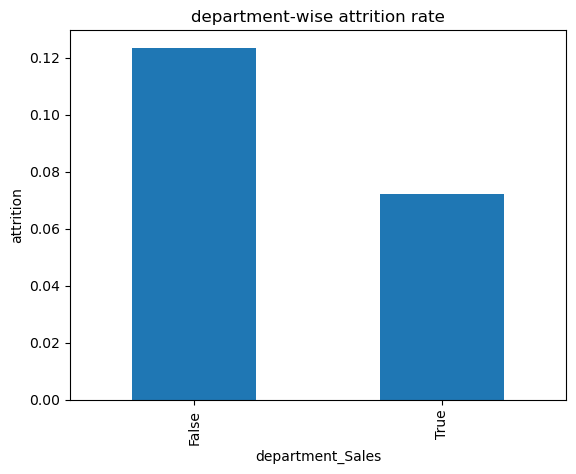

In [34]:
dept_attr=df.groupby('department_Sales')['Attrition'].mean()
dept_attr.plot(kind='bar')
plt.title('department-wise attrition rate')
plt.ylabel('attrition')
plt.show()

<Axes: xlabel='salary', ylabel='Count'>

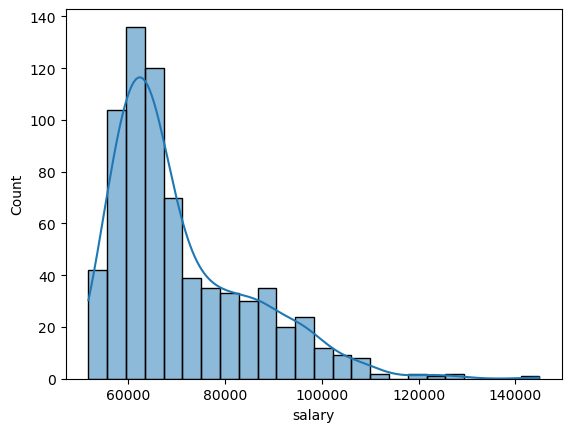

In [35]:
sns.histplot(df['salary'],kde=True)

<Axes: xlabel='Attrition', ylabel='salary'>

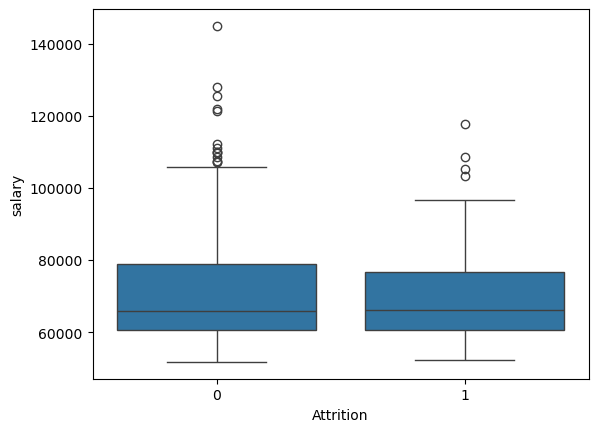

In [37]:
sns.boxplot(x='Attrition', y='salary', data=df)


<Axes: xlabel='age', ylabel='Count'>

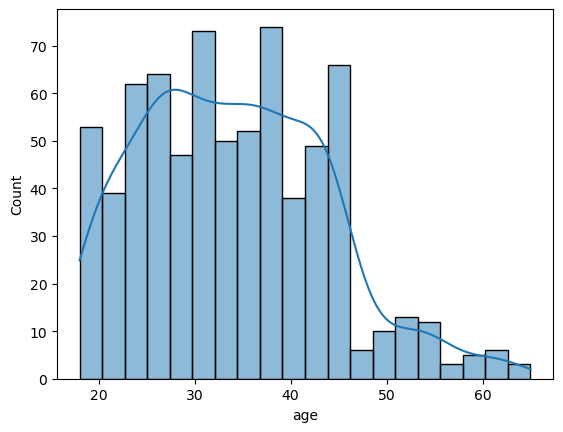

In [38]:
sns.histplot(df['age'], bins=20, kde=True)

<Axes: xlabel='Attrition', ylabel='experience_years'>

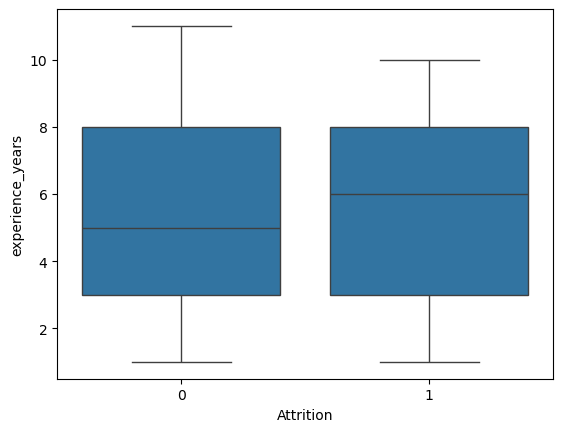

In [40]:
sns.boxplot(x='Attrition', y='experience_years', data=df)

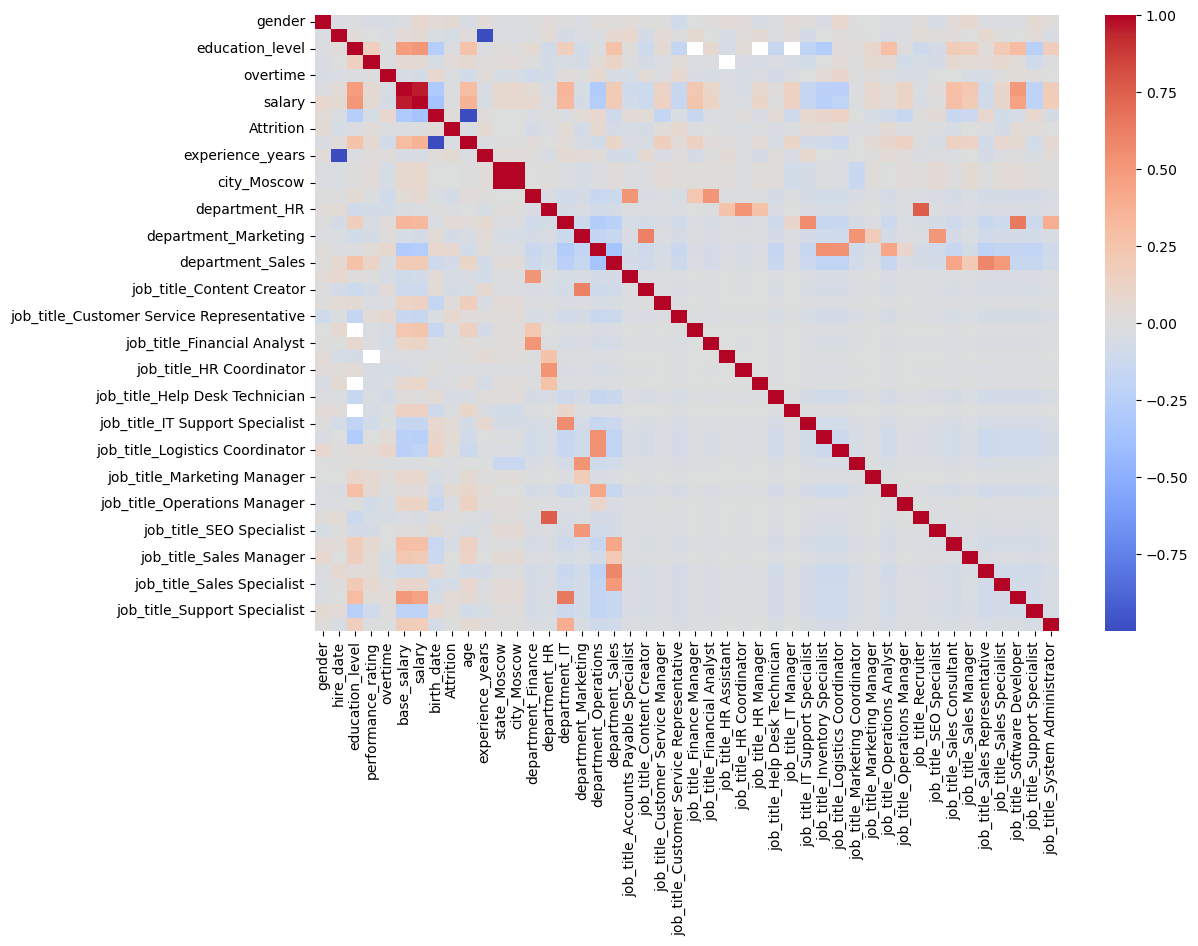

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

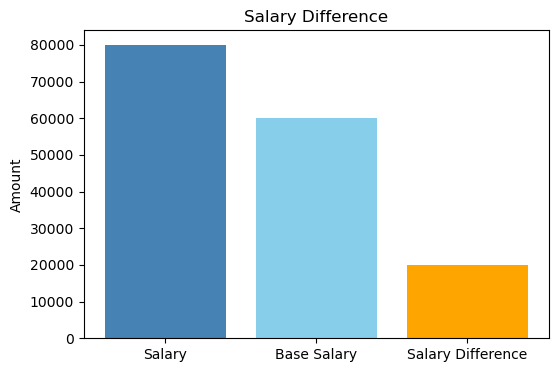

In [50]:
import matplotlib.pyplot as plt
salary_difference = salary - base_salary

# Labels and values
labels = ['Salary', 'Base Salary', 'Salary Difference']
values = [salary, base_salary, salary_difference]
colors = ['steelblue', 'skyblue', 'orange']

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=colors)
plt.title('Salary Difference')
plt.ylabel('Amount')
plt.show()

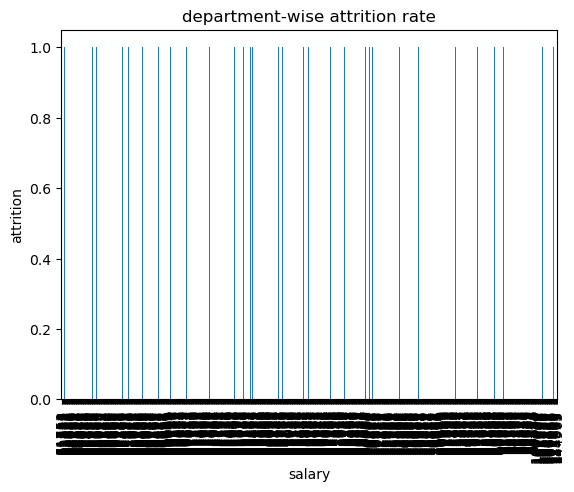

In [45]:
dept_attr=df.groupby('salary')['Attrition'].mean()
dept_attr.plot(kind='bar')
plt.title('department-wise attrition rate')
plt.ylabel('attrition')
plt.show()